In [1]:
from DP.projected_gradient_ascent import projected_gradient_ascent
from DP.linear_solver import linear_solver
from DP.DP_tester import DP_tester
from DP.utils import print_matrix, binom_optimal_privacy, fisher_information_privatized, reduce_optimal_matrix

In [2]:
from DP.projected_gradient_ascent import project_onto_feasible_set
import numpy as np

q = np.array([[1, 0], [0, 1]])

project_onto_feasible_set(q, 1.0)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Nov 25 08:45:39 PM: Your problem has 4 variables, 14 constraints, and 0 parameters.
(CVXPY) Nov 25 08:45:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 25 08:45:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 25 08:45:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 25 08:45:39 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 25 08:45:39 PM: Compiling problem (target solver=SCS).
(CVXP

array([[0.73106543, 0.26893454],
       [0.26893454, 0.73106543]])

In [3]:
N = 1
EPSILON = 1.0
THETA = 0.5

opt_q, status, history = binom_optimal_privacy(projected_gradient_ascent(), N, EPSILON, THETA)
print_matrix(reduce_optimal_matrix(opt_q))
print(status)
print(fisher_information_privatized(opt_q, N, THETA))
print("==================")

opt_q, _, _ = binom_optimal_privacy(linear_solver(), N, EPSILON, THETA)
print_matrix(opt_q)
print(fisher_information_privatized(opt_q, N, THETA))

row 0: 0.7310647871243539	0.2689476225509061
row 1: 0.26893521997082476	0.7310523703540699
Converged after 4 iteratons.
0.8542090690746243
row 0: 0.26894142136999516	0.7310585786300049
row 1: 0.7310585786300048	0.2689414213699951
0.8542090681362903


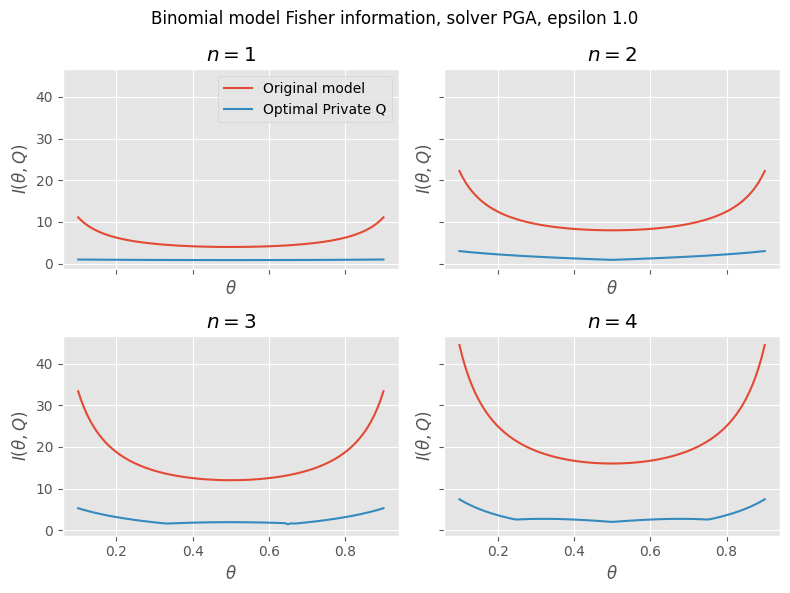

In [4]:
DP_tester.plot_fisher_infos(projected_gradient_ascent(), ns=[1, 2, 3, 4], epsilon=1.0)

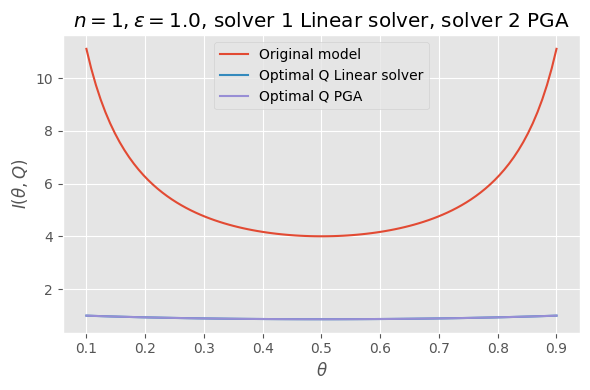

In [5]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 1, 1.0)

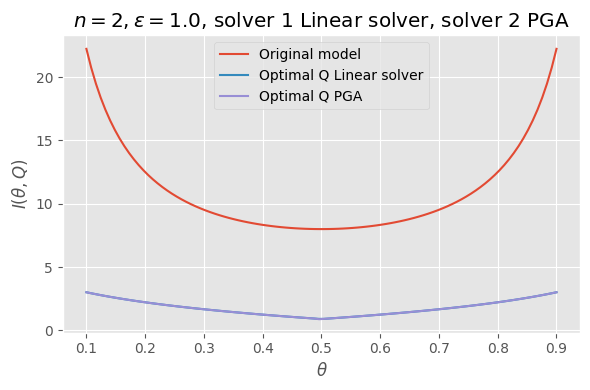

In [6]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 2, 1.0)

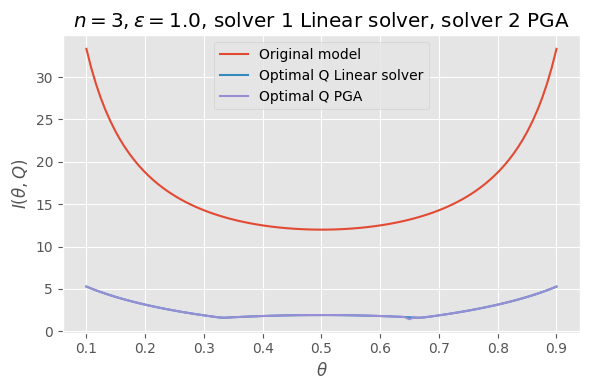

In [6]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 3, 1.0)

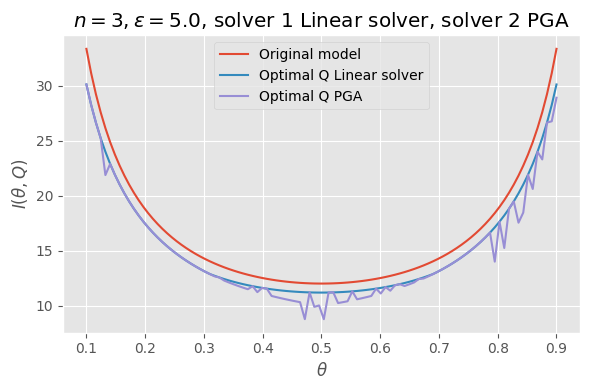

In [7]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 3, 5.0)

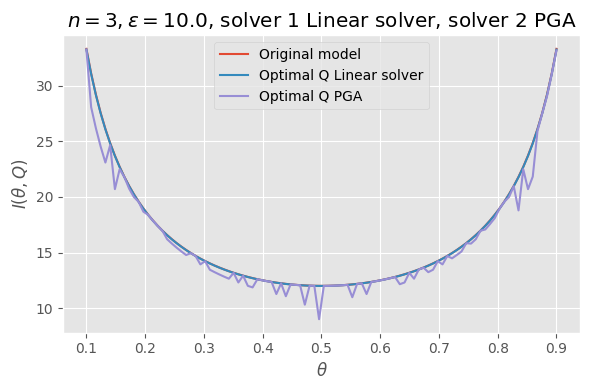

In [8]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 3, 10.0)

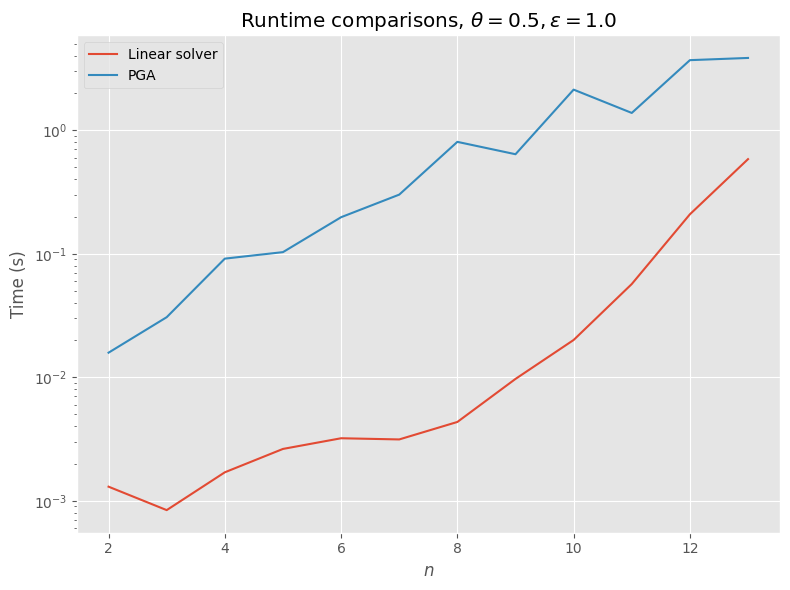

In [9]:
DP_tester.compare_runtimes([linear_solver(), projected_gradient_ascent()], [i for i in range(2, 14)], 0.5, 1.0, log=True)